# Influence of healty diet on COVID-19  cases
As we all aware the current unprecedented and struggle situation due to COVID-19. I intend to figure out can we beat COVID-19 by adopting a healthy diet style?

##  Data
The data is downloaded from Kaggle website https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset

* The data consists of countries with various food supply quantities, world population, obesity and     undernourished rate and COVID-19 confirmed, recovered and dead cases.
* Data for different food group supply quantities, nutrition values, obesity, and undernourished       percentages are obtained from Food and Agriculture Organization of the `United Nations FOA website`.
* Data for population count for each country comes from `Population Reference Bureau PRB website`. 
* Data for COVID-19 confirmed, deaths, recovered and active cases are obtained from Johns Hopkins    `Center for Systems Science and Engineering CSSE website`. 




In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import datasets of food supply and fat supply
data = pd.read_csv("Food_Supply_Quantity_kg_Data_latest.csv")
data.head()


,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.009931,0.000287,0.001241,0.008404,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.029741,0.001085,0.021693,0.006963,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.012369,0.001124,0.005684,0.005561,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000137,0.000006,0.000035,0.000095,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.025773,0.003093,0.016495,0.006186,97000.0,%


In [3]:
data.dropna(inplace=True)

##  countrywise death rate

In [4]:
# Sorting dataset based on death rate
data_sorted_deaths = data.sort_values(["Deaths"], ascending=False)
data_sorted_deaths

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
14,Belgium,5.3730,0.8559,17.7279,0.0010,6.6704,0.6487,1.1325,4.1623,3.2370,...,6.8161,32.2637,24.5,<2.5,0.453927,0.074367,0.115212,0.264348,11458000.0,%
141,Spain,5.3152,0.2357,18.3382,0.0011,6.0548,0.7321,2.2646,4.8332,5.3456,...,7.8139,31.6581,27.1,<2.5,0.473429,0.055869,0.278606,0.138954,47073000.0,%
74,Italy,3.1892,0.2834,19.0329,0.0005,8.5417,0.6247,1.5816,6.0207,4.2963,...,6.9463,30.9671,22.9,<2.5,0.359906,0.050047,0.164095,0.145764,60345000.0,%
159,United Kingdom,5.2632,0.2754,18.8798,0.0006,6.5412,0.6210,1.0911,4.9551,4.4181,...,4.5851,31.1116,29.5,<2.5,0.318150,0.046857,0.001492,0.269801,66833000.0,%
51,France,4.1631,0.7907,21.7097,0.0011,6.9951,0.6110,1.8214,4.8780,4.4005,...,5.1223,28.2903,23.2,<2.5,0.271774,0.040462,0.086208,0.145104,64834000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Uganda,6.1671,0.0352,5.6473,0.0000,6.7480,0.0815,1.0442,11.3112,0.8978,...,2.6703,44.3536,4.1,41,0.000228,0.000000,0.000124,0.000104,44270000.0,%
107,Nepal,0.3318,0.0312,5.4355,0.0000,18.1511,0.1435,0.2050,4.7443,0.9817,...,9.2770,44.5576,3.8,8.7,0.000357,0.000000,0.000108,0.000248,28609000.0,%
24,Cambodia,4.5783,0.0377,6.0800,0.0000,24.8906,0.1310,4.2369,2.3184,1.2247,...,3.0072,43.9195,3.5,16.4,0.000740,0.000000,0.000728,0.000012,16487000.0,%
27,Central African Republic,1.7435,0.1228,6.9032,0.0000,3.8844,0.0510,0.8041,4.5543,3.7346,...,1.9214,43.0942,6.3,59.6,0.003014,0.000000,0.000211,0.002803,4745000.0,%


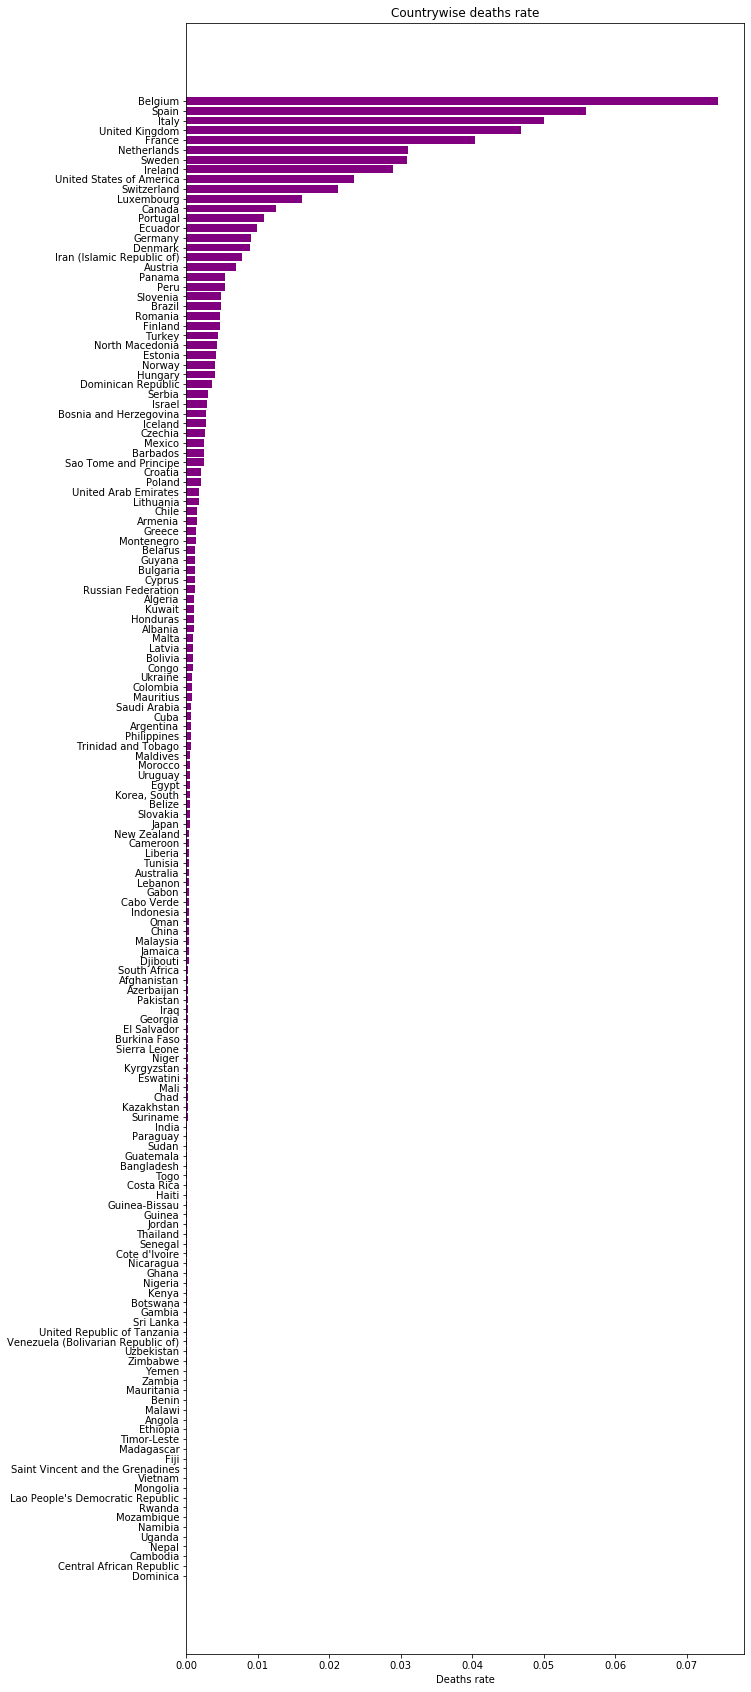

In [5]:
# Plot of countrywise death rate
fig, ax = plt.subplots(figsize=(10, 30))
plt.barh(data_sorted_deaths["Country"], data_sorted_deaths["Deaths"], color="purple")
ax.set(title="Countrywise deaths rate",
      xlabel="Deaths rate")
ax.invert_yaxis();

## Countrywise confirmed cases

In [6]:
data_sorted_confirmed=data.sort_values(["Confirmed"], ascending=False)
data_sorted_confirmed

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
91,Luxembourg,8.0858,0.5443,14.6038,0.0051,5.1366,0.7875,1.6249,4.4841,4.0469,...,4.8536,35.3838,24.2,<2.5,0.624355,0.016129,0.568710,0.039516,620000.0,%
67,Iceland,4.7545,0.9461,23.9700,0.0025,4.1196,0.5557,4.6117,4.8405,4.6269,...,3.6874,26.0331,23.1,<2.5,0.498892,0.002770,0.488920,0.007202,361000.0,%
141,Spain,5.3152,0.2357,18.3382,0.0011,6.0548,0.7321,2.2646,4.8332,5.3456,...,7.8139,31.6581,27.1,<2.5,0.473429,0.055869,0.278606,0.138954,47073000.0,%
72,Ireland,7.5703,0.8710,18.5712,0.0005,6.3057,0.4653,1.1942,3.3996,4.0102,...,4.9510,31.4242,26.9,<2.5,0.456388,0.028933,0.346426,0.081029,4939000.0,%
14,Belgium,5.3730,0.8559,17.7279,0.0010,6.6704,0.6487,1.1325,4.1623,3.2370,...,6.8161,32.2637,24.5,<2.5,0.453927,0.074367,0.115212,0.264348,11458000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Uganda,6.1671,0.0352,5.6473,0.0000,6.7480,0.0815,1.0442,11.3112,0.8978,...,2.6703,44.3536,4.1,41,0.000228,0.000000,0.000124,0.000104,44270000.0,%
98,Mauritania,0.0055,0.1127,15.0193,0.0000,20.4873,0.2539,1.0025,1.2991,3.3994,...,3.9784,34.9779,11.3,10.4,0.000177,0.000022,0.000133,0.000022,4526000.0,%
48,Ethiopia,2.4543,0.0276,5.2956,0.0000,22.0779,0.0594,0.0608,1.1774,0.7462,...,1.8449,44.6989,3.6,20.6,0.000173,0.000004,0.000085,0.000085,112079000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000137,0.000006,0.000035,0.000095,31427000.0,%


 **We can see that `Yemen` has the `lowest confirmed` cases whereas `Luxembourg` has the `highest confirmed` cases.**

### Plot of countries with confirmed cases from highest to lowest

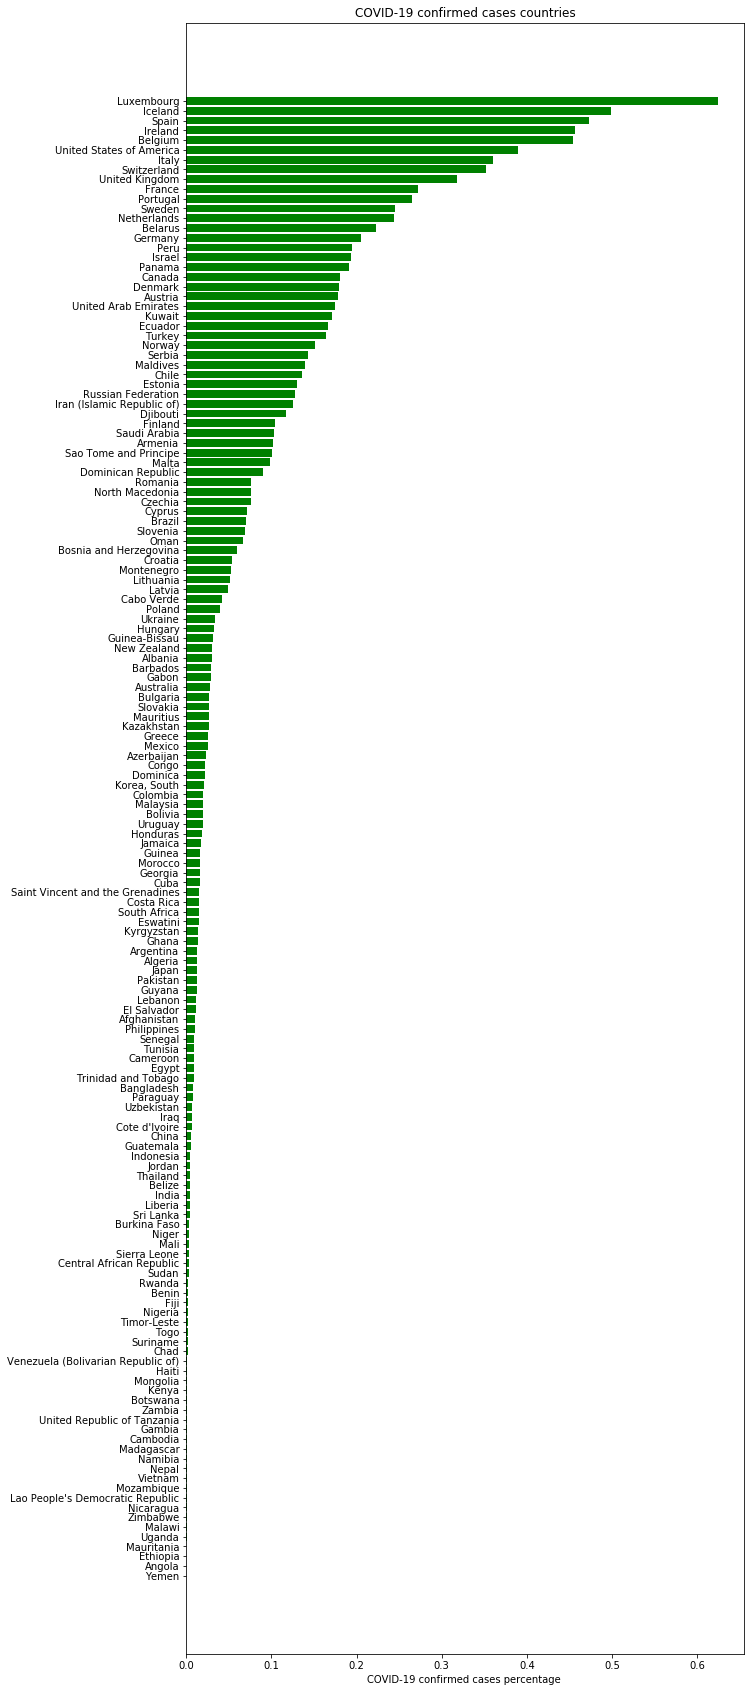

In [7]:
# Plot for top 50 confirmed cases countries
fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(data_sorted_confirmed["Country"], data_sorted_confirmed["Confirmed"], color="green")
ax.set(title="COVID-19 confirmed cases countries")
ax.set(xlabel="COVID-19 confirmed cases percentage ")
ax.invert_yaxis()


## Correlation Matrix 

In [8]:
# Correlation matrix of subdata set which is formed by excluding first column and last two columns of food supply data 
data_corr = data.iloc[:,1:30].corr()
data_corr

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active
Alcoholic Beverages,1.000000,0.447869,0.340207,0.065237,-0.400907,0.150467,-0.027609,-0.213261,0.323501,0.267963,...,-0.206706,-0.116625,-0.116316,-0.275668,-0.340254,0.189940,0.324626,0.256679,0.293784,0.196195
Animal fats,0.447869,1.000000,0.637671,0.002075,-0.450720,0.279367,-0.046085,-0.237020,0.387015,0.565288,...,-0.133600,0.037358,-0.144416,-0.008897,-0.637601,0.406970,0.446384,0.359857,0.414785,0.253256
Animal Products,0.340207,0.637671,1.000000,0.000449,-0.560945,0.488409,-0.024250,-0.242892,0.615460,0.917355,...,-0.148126,0.081981,-0.075211,0.078862,-1.000000,0.577788,0.489784,0.391229,0.368941,0.394582
"Aquatic Products, Other",0.065237,0.002075,0.000449,1.000000,-0.004462,0.078505,0.176265,-0.051832,0.073764,-0.096926,...,-0.021571,0.024709,0.061534,0.152500,-0.000425,-0.125137,-0.036293,-0.027748,-0.016572,-0.043801
Cereals - Excluding Beer,-0.400907,-0.450720,-0.560945,-0.004462,1.000000,-0.237627,0.065879,-0.243821,-0.406900,-0.507607,...,0.188838,-0.077937,0.217094,-0.127263,0.560875,-0.530349,-0.422658,-0.301428,-0.330116,-0.331390
Eggs,0.150467,0.279367,0.488409,0.078505,-0.237627,1.000000,0.237913,-0.062632,0.511575,0.274632,...,-0.171344,0.158735,0.133646,0.154026,-0.488353,0.455813,0.281678,0.181978,0.183742,0.272789
"Fish, Seafood",-0.027609,-0.046085,-0.024250,0.176265,0.065879,0.237913,1.000000,-0.030746,0.063847,-0.293999,...,-0.017716,0.181020,-0.001927,-0.050718,0.024196,-0.190658,0.139484,0.034985,0.113432,0.114908
Fruits - Excluding Wine,-0.213261,-0.237020,-0.242892,-0.051832,-0.243821,-0.062632,-0.030746,1.000000,-0.072484,-0.232554,...,0.010742,-0.006906,-0.076354,-0.052776,0.243004,0.110993,-0.039672,-0.059560,-0.079883,0.039673
Meat,0.323501,0.387015,0.615460,0.073764,-0.406900,0.511575,0.063847,-0.072484,1.000000,0.322412,...,-0.165427,0.073643,0.132465,-0.025852,-0.615431,0.567626,0.310062,0.208021,0.219996,0.275778
Milk - Excluding Butter,0.267963,0.565288,0.917355,-0.096926,-0.507607,0.274632,-0.293999,-0.232554,0.322412,1.000000,...,-0.098742,0.021870,-0.130975,0.100865,-0.917362,0.497450,0.408004,0.359065,0.306711,0.323396


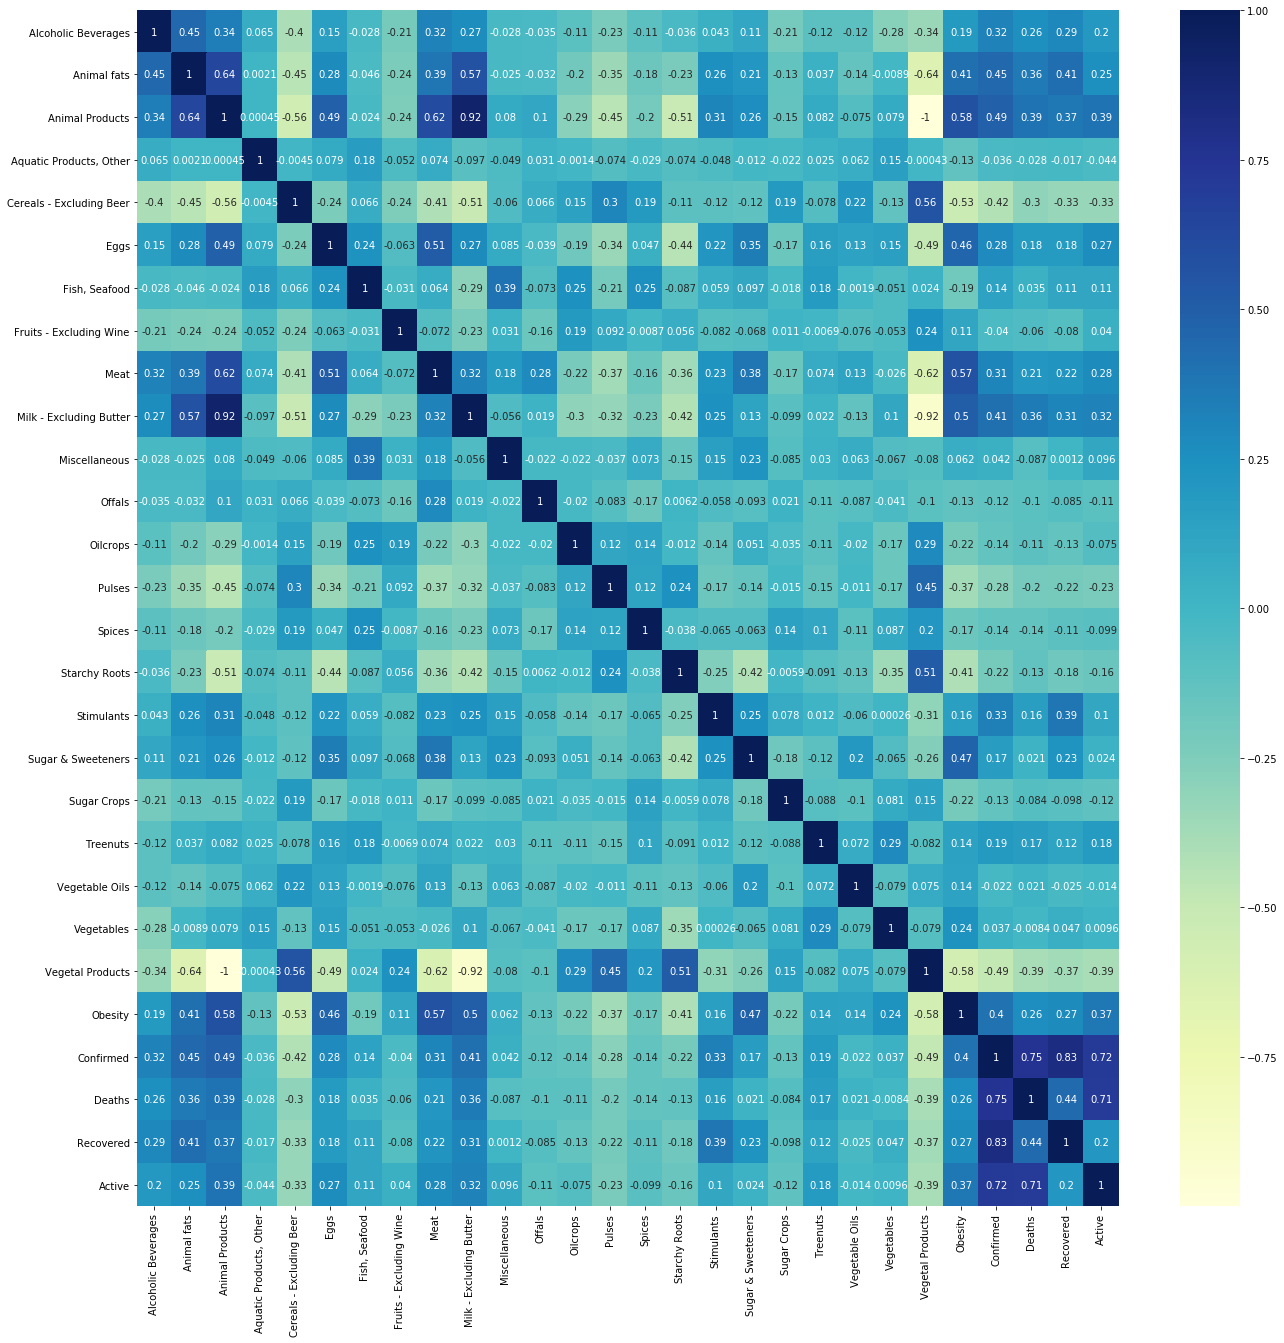

In [9]:
# Correlation matrix plot
import seaborn as sn

plt.figure(figsize=(22, 22))
sn.heatmap(data_corr, annot=True, cmap='YlGnBu');

* Animal products and animal facts are positively correlated with confirmed COVID-19 cases. 
* Aquatic products and vegetable oils are highly negatively correlated with confirmed cases.

## Predicting confirmed cases based on the diet by building a Machine Learning model

In [10]:
# Creating new DataFrame by extracting diet columns from original dataset
data_diet = data.iloc[:, 1:24]
data_diet.head()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products
0,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645
1,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304
2,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651
3,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722
5,4.2672,0.2234,19.3454,0.0,8.4102,0.9979,0.4693,6.0435,7.0421,10.2328,...,0.0528,0.0122,3.0420,0.4378,3.0536,0.0,0.0200,0.9541,4.3503,30.6559


In [11]:
# Setup random seed
np.random.seed(42)

# Split diet data into x and y
x = data_diet
y = data["Confirmed"]
x.shape, y.shape

((152, 23), (152,))

In [12]:
# Split train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Check x_train, y_train, x_test and y_test shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((121, 23), (121,), (31, 23), (31,))

In [13]:
# Building a Machine Learning model using RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

#Build the model
model = RandomForestRegressor()

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# Test the model
model.score(x_test, y_test)

0.6347068876290334

## Model evaluation metrics

**R^2 (coefficient of determination)**

In [14]:
# R^2
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean.shape, y_test.shape

# Check r2 score
r2_score(y_test, y_test_mean)

0.0

## Mean absolute error

In [17]:
from sklearn.metrics import mean_absolute_error

# Model predictions
y_preds = model.predict(x_test)
# Absolute mean error
mean_absolute_error(y_test, y_preds)


0.056282611655352546

In [18]:
# Creating a dataframe with actual and predicted values and their differences
Diff_data = pd.DataFrame({"Actual values" : y_test,
                  "Predicted values" : y_preds,
                   "Difference" : y_test - y_preds})
Diff_data

,Actual values,Predicted values,Difference
91,0.624355,0.184856,0.439499
22,0.003661,0.008684,-0.005023
47,0.014507,0.019429,-0.004922
49,0.002018,0.014374,-0.012356
160,0.000878,0.042414,-0.041536
138,0.069444,0.165625,-0.096181
162,0.019722,0.095993,-0.076271
130,0.015315,0.044540,-0.029225
11,0.008025,0.016150,-0.008125
97,0.097800,0.061567,0.036233


## Mean squared error

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)


0.008863124970104047